# <font color = 'Green'>Python_Programming_TensorFlow_Keras_Performance</font>

**For this homework you will be exploring two types of deep learning models on the MNIST image database, one using many dense sequential layers constructed using Keras, and the second using a mix of convolutional and pooling layers constructed based on a CNN deep learning model. You can use any architecture you want for each of these two.**

**1. In the first pass, use the traditional densely connected multi-layer architecture and build a few deep learning models with the goal of gradually increasing accuracies on a validation dataset. Try (sequentially) three different configurations and report those results (even if they aren’t getting better as you thought).**

In [1]:
#Import Required Libraries
from __future__ import print_function
from matplotlib import pyplot as plt
from tensorflow import keras
from sklearn.metrics import confusion_matrix
from keras import backend as K
from keras.datasets import mnist
from keras.models import Sequential,model_from_json
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop

In [2]:
#Split Data Into Train and Test Sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

## 1st Model

In [3]:
#Reshaping Data for Neural Networks
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [4]:
#Build Categorical Matrix on Y column
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [5]:
#Layering for Neural Networks Which in this Case is Three
model = Sequential()
model.add(Dense(400, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(300, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [6]:
#Model Encoding
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [7]:
batch_size = 128
num_classes = 10
epochs = 20

In [8]:
#Fitting Model for Epoch 20
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test))

Epoch 1/20
469/469 [==============================] - 3s 6ms/step - loss: 0.2648 - accuracy: 0.9189 - val_loss: 0.1136 - val_accuracy: 0.9661
Epoch 2/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1092 - accuracy: 0.9664 - val_loss: 0.0833 - val_accuracy: 0.9746
Epoch 3/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0794 - accuracy: 0.9759 - val_loss: 0.0831 - val_accuracy: 0.9750
Epoch 4/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0655 - accuracy: 0.9799 - val_loss: 0.0829 - val_accuracy: 0.9749
Epoch 5/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0552 - accuracy: 0.9832 - val_loss: 0.0730 - val_accuracy: 0.9793
Epoch 6/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0481 - accuracy: 0.9853 - val_loss: 0.0722 - val_accuracy: 0.9803
Epoch 7/20
469/469 [==============================] - 3s 5ms/step - loss: 0.0406 - accuracy: 0.9876 - val_loss: 0.0774 - val_accuracy: 0.9791
Epoch 

In [11]:
#Scoring Model
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print(history.history.keys())

Test loss: 0.11716295033693314
Test accuracy: 0.9828000068664551
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


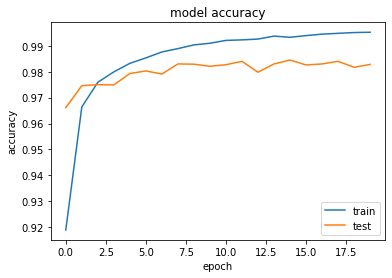

In [12]:
#Plotting
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

## 2nd Model

In [13]:
#Layering for Neural Networks Which in this Case is Four and Encoding
model = Sequential()
model.add(Dense(300, activation='relu', input_shape=(784,)))
model.add(Dropout(0.5))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dropout_2 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 200)               60200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               20100     
_________________________________________________________________
dropout_4 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)               

In [14]:
#Fitting Model
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test))

Epoch 1/20
469/469 [==============================] - 2s 4ms/step - loss: 0.6167 - accuracy: 0.8103 - val_loss: 0.1900 - val_accuracy: 0.9471
Epoch 2/20
469/469 [==============================] - 2s 3ms/step - loss: 0.2726 - accuracy: 0.9275 - val_loss: 0.1621 - val_accuracy: 0.9543
Epoch 3/20
469/469 [==============================] - 2s 3ms/step - loss: 0.2262 - accuracy: 0.9408 - val_loss: 0.1322 - val_accuracy: 0.9656
Epoch 4/20
469/469 [==============================] - 2s 3ms/step - loss: 0.2018 - accuracy: 0.9497 - val_loss: 0.1119 - val_accuracy: 0.9699
Epoch 5/20
469/469 [==============================] - ETA: 0s - loss: 0.1808 - accuracy: 0.95 - 1s 3ms/step - loss: 0.1809 - accuracy: 0.9552 - val_loss: 0.1094 - val_accuracy: 0.9730
Epoch 6/20
469/469 [==============================] - 1s 3ms/step - loss: 0.1748 - accuracy: 0.9581 - val_loss: 0.1218 - val_accuracy: 0.9726
Epoch 7/20
469/469 [==============================] - 2s 3ms/step - loss: 0.1678 - accuracy: 0.9604 - val_

In [15]:
#Scoring Model
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print(history.history.keys())

Test loss: 0.12950198352336884
Test accuracy: 0.9786999821662903
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


## 3rd Model

In [16]:
#Layering for Neural Networks Which in this Case is Four and Encoding
model = Sequential()
model.add(Dense(200, activation='relu', input_shape=(784,)))
model.add(Dropout(0.7))
model.add(Dense(300, activation='relu'))
model.add(Dropout(0.7))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.7))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
epochs = 25

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 200)               157000    
_________________________________________________________________
dropout_5 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 300)               60300     
_________________________________________________________________
dropout_6 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 250)               75250     
_________________________________________________________________
dropout_7 (Dropout)          (None, 250)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)               

In [22]:
#Fitting Model
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test))

Epoch 1/25
469/469 [==============================] - 2s 3ms/step - loss: 0.3975 - accuracy: 0.9212 - val_loss: 0.2352 - val_accuracy: 0.9615
Epoch 2/25
469/469 [==============================] - 1s 3ms/step - loss: 0.4056 - accuracy: 0.9224 - val_loss: 0.2270 - val_accuracy: 0.9619
Epoch 3/25
469/469 [==============================] - 1s 3ms/step - loss: 0.3934 - accuracy: 0.9228 - val_loss: 0.2495 - val_accuracy: 0.9638
Epoch 4/25
469/469 [==============================] - 1s 3ms/step - loss: 0.3897 - accuracy: 0.9228 - val_loss: 0.2616 - val_accuracy: 0.9644
Epoch 5/25
469/469 [==============================] - 1s 3ms/step - loss: 0.4156 - accuracy: 0.9218 - val_loss: 0.2269 - val_accuracy: 0.9636
Epoch 6/25
469/469 [==============================] - 1s 3ms/step - loss: 0.4066 - accuracy: 0.9201 - val_loss: 0.2434 - val_accuracy: 0.9633
Epoch 7/25
469/469 [==============================] - 1s 3ms/step - loss: 0.4031 - accuracy: 0.9224 - val_loss: 0.2512 - val_accuracy: 0.9623
Epoch 

In [23]:
#Scoring Model
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print(history.history.keys())

Test loss: 0.30405309796333313
Test accuracy: 0.9623000025749207
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


**In Summary:**

**1st Model Accuracy = 0.982**

**2nd Model Accuracy = 0.978**

**3rd Model Accuracy = 0.962**

**Accuracy dropped and the test loss has increased which means the model is overfitting the Data. Hence we need to add regularization parameters to correct for it.**